In [1]:
import numpy as np
import sklearn.ensemble._forest as forest_utils
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X, y = iris.data, iris.target

rf = RandomForestRegressor(random_state=140902, max_depth=1)
rf.fit(X,y)

RandomForestRegressor(max_depth=1, random_state=140902)

In [115]:
trees = rf.estimators_
trees_test = trees[:4]

In [157]:
samples_used = rf.estimators_samples_

samplesidx = set()
for samples in samples_used:
    for sampleidx in samples:
        samplesidx.add(sampleidx)
samplesidx = list(samplesidx)

def get_unions(X, y, samples_used_idx):
    return X[samples_used_idx], y[samples_used_idx]

X_union, y_union = get_unions(X, y, samplesidx)

In [170]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class TreeCombiner:
    def __init__(self, trees, X_union, y_union):
        self.trees = trees
        self.root = Node()
        self.X = X_union
        self.y = y_union
    
    def combiner(self, node, depth=0):
        if depth >= len(self.trees):
            return
        
        tree = self.trees[depth].tree_

        node.feature = tree.feature[0]
        node.threshold = tree.threshold[0]
        node.left = Node()
        node.right = Node()

        self.combiner(node.left, depth + 1)
        self.combiner(node.right, depth + 1)

        if depth == len(self.trees) - 1:
            node.left.value = tree.value[1][0][0]
            node.right.value = tree.value[2][0][0]

    def recompute_values(self, node=None, X_subset=None):
        pass

    def combine_trees(self):
        self.combiner(self.root, 0)
        self.recompute_values()

    def predict(self, observation):
        node = self.root
        value = node.value
        while value is None:
            obs_ft_val  = observation[node.feature]
            if obs_ft_val <= node.threshold:
                node = node.left
            else:
                node = node.right
            if node.value is not None:
                value = node.value
        return value

    def print_tree(self, node, depth=0, prefix="Root"):
        indent = "    " * depth
        
        if node.value is not None:
            print(f"{indent}{prefix} --> [Leaf Value: {node.value:.2f}]")

        else:
            print(f"{indent}{prefix} --> [X[{node.feature}] <= {node.threshold:.2f}]")

            if node.left:
                self.print_tree(node.left, depth + 1, prefix="L")
            if node.right:
                self.print_tree(node.right, depth + 1, prefix="R")
    
    def __str__(self):
        self.print_tree(self.root)
        return ''

In [171]:
tst = TreeCombiner(trees_test, X_union, y_union)
tst.combine_trees()

[Text(0.5, 0.75, 'x[2] <= 2.45\nsquared_error = 0.653\nsamples = 100\nvalue = 1.027'),
 Text(0.25, 0.25, 'squared_error = 0.0\nsamples = 32\nvalue = 0.0'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'squared_error = 0.25\nsamples = 68\nvalue = 1.495'),
 Text(0.625, 0.5, '  False')]

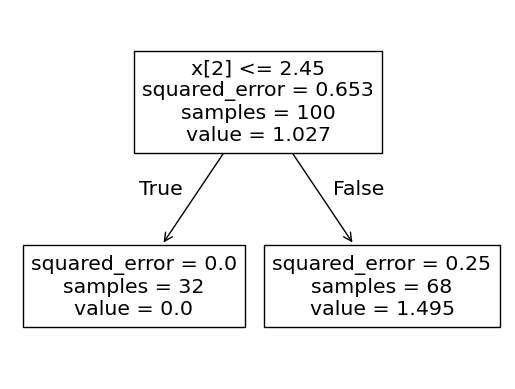

In [118]:
plot_tree(trees_test[0])

[Text(0.5, 0.75, 'x[3] <= 0.8\nsquared_error = 0.673\nsamples = 98\nvalue = 0.993'),
 Text(0.25, 0.25, 'squared_error = 0.0\nsamples = 32\nvalue = 0.0'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'squared_error = 0.25\nsamples = 66\nvalue = 1.505'),
 Text(0.625, 0.5, '  False')]

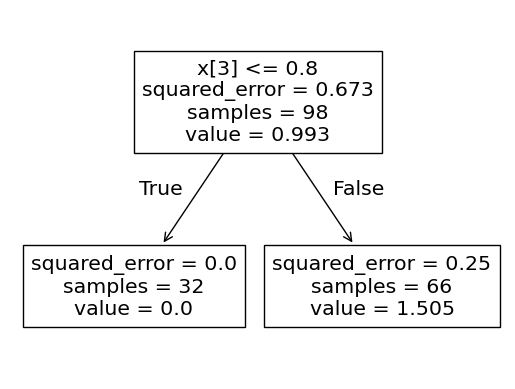

In [119]:
plot_tree(trees_test[1])

[Text(0.5, 0.75, 'x[3] <= 0.75\nsquared_error = 0.622\nsamples = 100\nvalue = 1.067'),
 Text(0.25, 0.25, 'squared_error = 0.0\nsamples = 32\nvalue = 0.0'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'squared_error = 0.25\nsamples = 68\nvalue = 1.481'),
 Text(0.625, 0.5, '  False')]

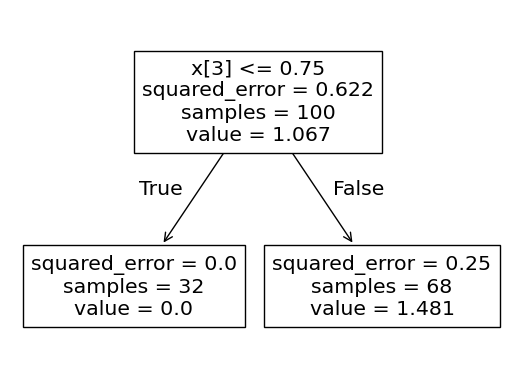

In [120]:
plot_tree(trees_test[2])

[Text(0.5, 0.75, 'x[3] <= 0.8\nsquared_error = 0.658\nsamples = 96\nvalue = 1.047'),
 Text(0.25, 0.25, 'squared_error = 0.0\nsamples = 34\nvalue = 0.0'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'squared_error = 0.25\nsamples = 62\nvalue = 1.51'),
 Text(0.625, 0.5, '  False')]

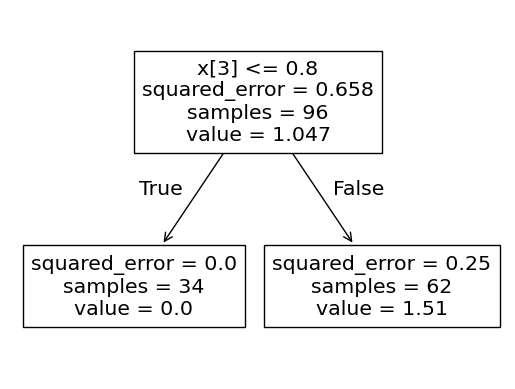

In [121]:
plot_tree(trees_test[3])

In [172]:
print(tst)

Root --> [X[2] <= 2.45]
    L --> [X[3] <= 0.80]
        L --> [X[3] <= 0.75]
            L --> [X[3] <= 0.80]
                L --> [Leaf Value: 0.00]
                R --> [Leaf Value: 1.51]
            R --> [X[3] <= 0.80]
                L --> [Leaf Value: 0.00]
                R --> [Leaf Value: 1.51]
        R --> [X[3] <= 0.75]
            L --> [X[3] <= 0.80]
                L --> [Leaf Value: 0.00]
                R --> [Leaf Value: 1.51]
            R --> [X[3] <= 0.80]
                L --> [Leaf Value: 0.00]
                R --> [Leaf Value: 1.51]
    R --> [X[3] <= 0.80]
        L --> [X[3] <= 0.75]
            L --> [X[3] <= 0.80]
                L --> [Leaf Value: 0.00]
                R --> [Leaf Value: 1.51]
            R --> [X[3] <= 0.80]
                L --> [Leaf Value: 0.00]
                R --> [Leaf Value: 1.51]
        R --> [X[3] <= 0.75]
            L --> [X[3] <= 0.80]
                L --> [Leaf Value: 0.00]
                R --> [Leaf Value: 1.51]
     

In [132]:
obs = X[111]
prediction = tst.predict(obs)

print(f'For obs = {obs} | {prediction:.2f}')

obs = X[1]
prediction = tst.predict(obs)

print(f'For obs = {obs} | {prediction:.2f}')

For obs = [6.4 2.7 5.3 1.9] | 1.51
For obs = [4.9 3.  1.4 0.2] | 0.00
